In [315]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
df = pd.read_csv('assurance_maladie.csv')
df.describe().round(3)


,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [317]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [318]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [319]:
df.duplicated().sum()

np.int64(1)

In [320]:
df.drop_duplicates(inplace=True)

In [321]:
df.duplicated().sum()

np.int64(0)

In [322]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [323]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

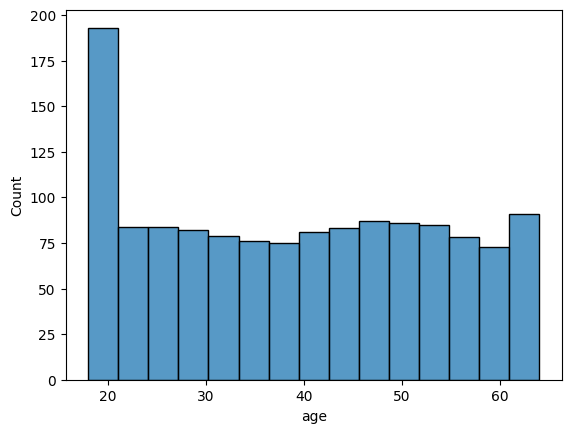

In [324]:
sns.histplot(data=df , x="age", binwidth=3)
plt.show()


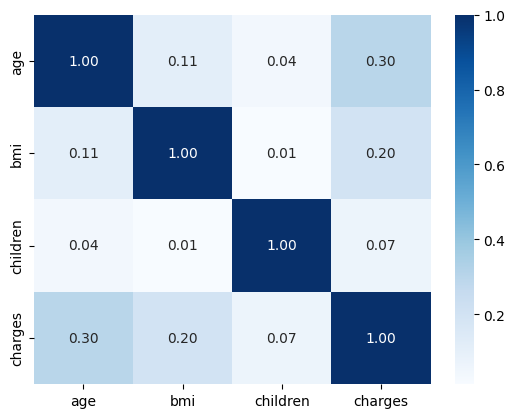

In [325]:
selected_columns_nums = ['age' , 'bmi' , 'children' , 'charges']
df_num = df[selected_columns_nums]
sns.heatmap(df_num.corr() , annot=True , cmap="Blues" , fmt=".2f" )
plt.show()


In [326]:
selected_columns_nums = ['age' , 'bmi' , 'children' , 'charges']

imputer_mean = SimpleImputer(strategy='mean')
df[selected_columns_nums] = imputer_mean.fit_transform(df[selected_columns_nums])


selected_columns_string = ['sex' , 'smoker' , 'region']
for i in range(len(selected_columns_string)):
    
    mode_category = df[selected_columns_string[i]].mode()[0]

    # Fill missing values with the calculated mode
    df[selected_columns_string].fillna(mode_category, inplace=True)
    
print(df)

    



       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1337 rows x 7 columns]


C:\Users\abirm\AppData\Local\Temp\ipykernel_35380\976773499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_columns_string].fillna(mode_category, inplace=True)
C:\Users\abirm\AppData\Local\Temp\ipykernel_35380\976773499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_columns_string].fillna(mode_category, inplace=True)
C:\Users\abirm\AppData\Local\Temp\ipykernel_35380\976773499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [327]:
df.duplicated().sum()

np.int64(0)

<Axes: title={'center': 'charges'}, xlabel='region'>

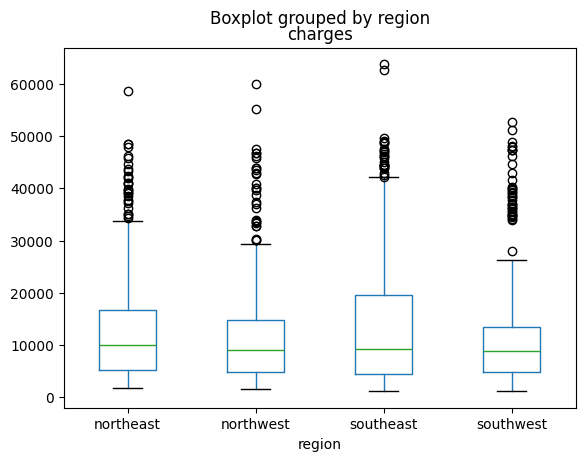

In [328]:
df.boxplot(by ='region', column =['charges'], grid = False)

In [329]:
print(df.shape)

(1337, 7)


In [382]:
from scipy.stats import zscore

for i in range(len(selected_columns_nums)):
    df['Z-score'] = zscore(df[selected_columns_nums[i]])
    df = df[df['Z-score'].abs() <= 3]  

df = df.drop(columns=['Z-score'])     
print(df)




       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1332  52.0  female  44.700       3.0     no  southwest  11411.68500
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500

[1087 rows x 7 columns]


In [331]:
#outliers = df[df['Z-score'].abs() > 3]
#print(outliers)


In [332]:
print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [397]:
for i in range(len(selected_columns_nums)):
    Q1 = df[selected_columns_nums[i]].quantile(0.25)
    Q3 = df[selected_columns_nums[i]].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    df = df[(df[selected_columns_nums[i]] >= lower_bound) & (df[selected_columns_nums[i]] <= upper_bound)]

print(df)






       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1332  52.0  female  44.700       3.0     no  southwest  11411.68500
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500

[1087 rows x 7 columns]


In [398]:
print(df.shape)
df_cleaned = df

(1087, 7)


<Axes: title={'center': 'bmi'}, xlabel='sex'>

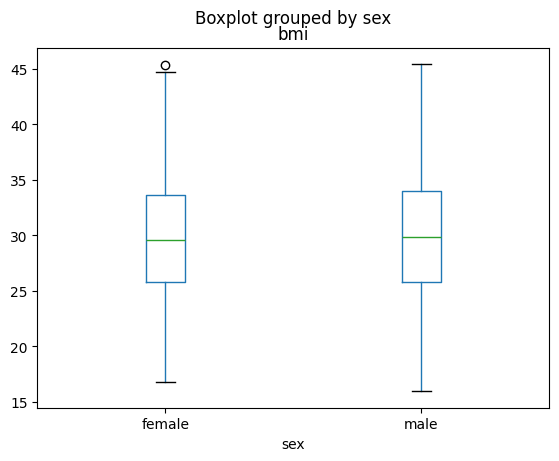

In [400]:
df_cleaned.boxplot(by ='sex', column =['bmi'], grid = False)

In [402]:
catg_cols = df.select_dtypes(include='object').columns.to_list()
print(catg_cols)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore' )
encoder.fit(df[catg_cols])

encoded_cols = list(encoder.get_feature_names_out(catg_cols))
df[encoded_cols] = encoder.transform(df[catg_cols])
print(df[encoded_cols])

['sex', 'smoker', 'region']
      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0            1.0       0.0        0.0         1.0               0.0   
1            0.0       1.0        1.0         0.0               0.0   
2            0.0       1.0        1.0         0.0               0.0   
3            0.0       1.0        1.0         0.0               0.0   
4            0.0       1.0        1.0         0.0               0.0   
...          ...       ...        ...         ...               ...   
1332         1.0       0.0        1.0         0.0               0.0   
1333         0.0       1.0        1.0         0.0               0.0   
1334         1.0       0.0        1.0         0.0               1.0   
1335         1.0       0.0        1.0         0.0               0.0   
1336         1.0       0.0        1.0         0.0               0.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0

In [414]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['bmi' , 'sex' , 'region' , 'smoker'])
Y = df_cleaned['bmi']
X.head()
Y.head()
X.shape
Y.shape
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , random_state=11 , test_size=0.2)
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape
X_train.describe().round(3)



,age,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,869.000,869.000,869.000,869.000,869.000,869.000,869.000,869.000,869.000,869.000,869.000
mean,38.743,1.008,8656.609,0.519,0.481,0.921,0.079,0.236,0.253,0.251,0.260
std,13.807,1.126,5429.278,0.500,0.500,0.271,0.271,0.425,0.435,0.434,0.439
min,18.000,0.000,1121.874,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,27.000,0.000,4237.127,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,39.000,1.000,7789.635,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,51.000,2.000,11884.049,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000
max,64.000,4.000,23563.016,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [415]:


X1 = df_cleaned[selected_columns_nums]
X2 = df_cleaned[selected_columns_nums]
from sklearn.preprocessing import StandardScaler
scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1)
X1 = pd.DataFrame(X1 , columns=selected_columns_nums)
X1.head()
X1.describe().round(3)



,age,bmi,children,charges
count,1087.000,1087.000,1087.000,1087.000
mean,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-1.476,-2.409,-0.904,-1.369
25%,-0.901,-0.718,-0.904,-0.820
50%,-0.038,-0.041,-0.011,-0.165
75%,0.824,0.661,0.883,0.603
max,1.831,2.657,2.671,2.721


In [416]:
from sklearn.preprocessing import MinMaxScaler
scaleminmax = MinMaxScaler(feature_range=(0,1))
X2 = scaleminmax.fit_transform(X2)
X2 = pd.DataFrame(X2 , columns=selected_columns_nums)
X2.describe().round(3)



,age,bmi,children,charges
count,1087.000,1087.000,1087.000,1087.000
mean,0.446,0.476,0.253,0.335
std,0.303,0.197,0.280,0.245
min,0.000,0.000,0.000,0.000
25%,0.174,0.334,0.000,0.134
50%,0.435,0.467,0.250,0.294
75%,0.696,0.606,0.500,0.482
max,1.000,1.000,1.000,1.000


In [424]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
lm = LinearRegression()
lm.fit(X_train , Y_train)
lm.coef_
cdf = pd.DataFrame(lm.coef_ , X.columns , columns=['Coef'])
#print(cdf)

y_pred = lm.predict(X_test)
mean_absolute_error(Y_test, y_pred)






4.666980965851627

In [425]:
mean_squared_error(Y_test , y_pred)

32.67928994627352

In [426]:
r2_score(Y_test , y_pred)

0.10774887133155431

In [421]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=13)
rfr.fit(X_train , Y_train)
y_pred = rfr.predict(X_test)
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mean_absolute_error(Y_test, y_pred)


4.34677362385321

In [422]:
mean_squared_error(Y_test , y_pred)

31.279119256800445

In [423]:
r2_score(Y_test , y_pred)

0.14597809479585688

In [427]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train , Y_train)
y_pred = xgb.predict(X_test)
mean_absolute_error(Y_test, y_pred)


4.719056132955289

In [429]:
y_pred_train = xgb.predict(X_train)
mean_absolute_error( Y_train, y_pred_train)

1.4013932401703197

In [430]:
mean_squared_error(Y_test , y_pred)

37.27960416125074

In [431]:
r2_score(Y_test , y_pred)

-0.01785470075618556

In [432]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train , Y_train)

y_pred = svr.predict(X_test)
mean_absolute_error(Y_test , y_pred)

5.004431017677428

In [434]:
mean_squared_error(Y_test , y_pred)

37.68839114800664

In [435]:
r2_score(Y_test , y_pred)

-0.029015917873129515